In [7]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from random import uniform
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [8]:
def sinal(x, y):
    if x*pesos[0] + y*pesos[1] + pesos[2]*1 >= 0:
        return 1
    else:
        return -1
    
def aprendizado(tupla):
    sin = sinal(tupla[0], tupla[1])
    if sin != tupla[2]: 
        global pesos
        pesos = pd.Series(pesos) + 0.2*(tupla[2] - sin)*pd.Series([tupla[0], tupla[1], 1])

def figura(x): 
    return -(pesos[0]*x)/pesos[1] - pesos[2]/pesos[1]

Pesos iniciais: [0.812, 0.874, 0.118]
Pesos finais:   [-2.244, 0.087, -0.282]


(-2, 9)

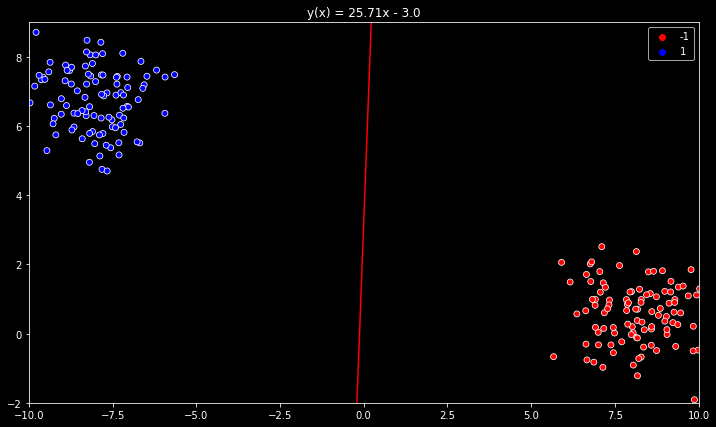

In [14]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2)
x1 = np.hsplit(X,2)[0].reshape(1, len(np.hsplit(X,2)[0]))[0]
x2 = np.hsplit(X,2)[1].reshape(1, len(np.hsplit(X,2)[0]))[0]
y[y == 0] = -1

global pesos
pesos = pd.Series([uniform(-1, 1), uniform(-1, 1), uniform(-1, 1)]) # pesos iniciais do exemplo
print(f'Pesos iniciais: {list(round(pesos, 3))}')

for k in range(50): # 50 épocas
    for i in range(len(X)): # 200 iterações
        aprendizado((X[i][0], X[i][1], y[i])) 

print(f'Pesos finais:   {list(round(pesos, 3))}') # a*x1 + b*x2 + c = 0
lista = pd.DataFrame([(i, figura(i)) for i in range(int(round(min(x1))), int(round(max(x1))))])
plt.figure(figsize=(12, 7))
plt.style.use('dark_background')
sns.scatterplot(x1, x2, hue = y, palette = {1:'blue', -1:'red'})
plt.plot(lista[0], lista[1], color = 'r')
plot = plt.title(f'y(x) = {round(-pesos[0]/pesos[1], 2)}x - {abs(round(pesos[2]/pesos[1]))}')
plt.xlim(int(round(min(x1))), int(round(max(x1)))-1)
plt.ylim(int(round(min(x2))), int(round(max(x2)))-1)